## Homework 1 Part 2 Task 2: PCA
We will use the Fashion-MNIST dataset to build a PCA model (i.e. eigenvectors and eigenvalues). <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [0]:
# load the data
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [0]:
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [3]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [4]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [5]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [6]:
[target.min(), target.max()]

[0, 9]

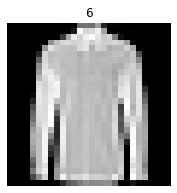

<Figure size 432x288 with 0 Axes>

In [7]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [0]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [9]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it is runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function fit computes eigenvectors and eigenvalues
#use fit_transform to do fit and forward transform
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components = 2, whiten=False)
transform_data = pca.fit_transform(data)
transform_data.shape

(70000, 2)

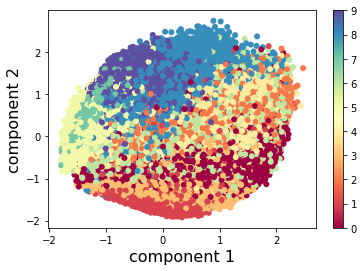

In [10]:
transform_data = transform_data / np.sqrt(pca.explained_variance_)
plt.scatter(transform_data[:, 0], transform_data[:, 1], c=target, edgecolor='none',  cmap='Spectral')
plt.xlabel('component 1', fontsize=16)
plt.ylabel('component 2', fontsize=16)
plt.colorbar()


In [0]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)


Text(0, 0.5, 'component 2')

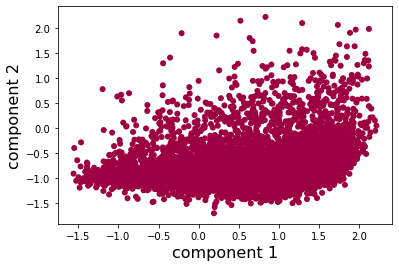

In [11]:

plt.scatter(transform_data[target == 0 , 0], transform_data[target == 0, 1], c=target[target == 0], edgecolor='none',  cmap='Spectral')
plt.xlabel('component 1', fontsize=16)
plt.ylabel('component 2', fontsize=16)

In [0]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D


In [0]:
from sklearn.decomposition import PCA
model = PCA(n_components=2,svd_solver='randomized').fit(data)
plot_components(transform_data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

In [0]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model


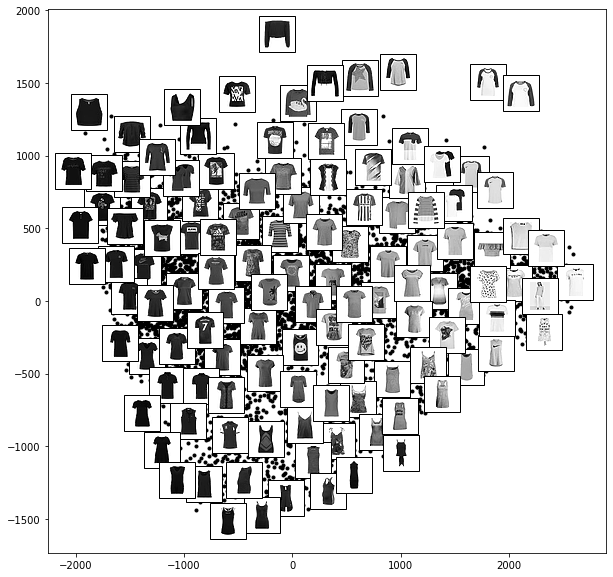

In [40]:
# use plot_components to show the data points with class label=0

data0 = data[target == 0]

fig, ax = plt.subplots(figsize=(10, 10))
model = PCA(n_components=2,svd_solver='randomized').fit(data0)
plot_components(data0, model, data0.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

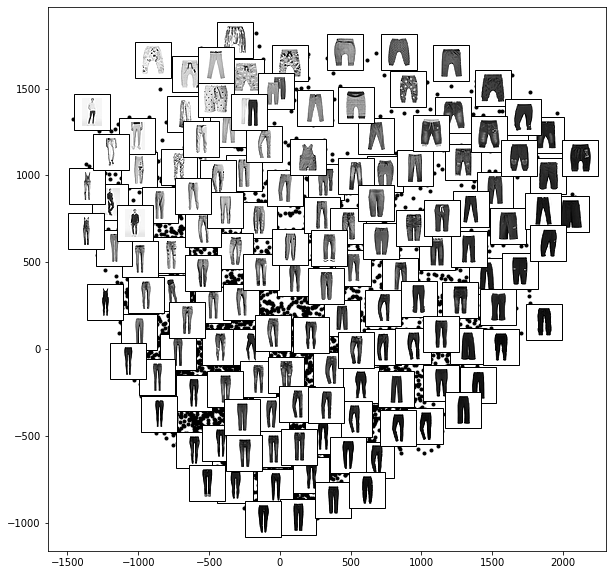

In [42]:
# use plot_components to show the data points with class label=1
data1 = data[target == 1]

fig, ax = plt.subplots(figsize=(10, 10))
model = PCA(n_components=2 ,svd_solver='randomized').fit(data1)
plot_components(data1, model, images=data1.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [0]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100


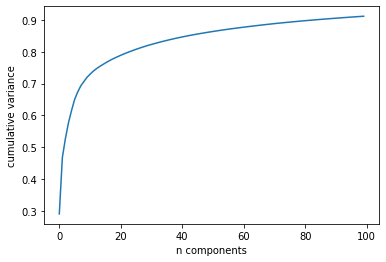

In [45]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#use explained_variance_ratio_ to compute percentage of variance explained
# explained_variance_ratio_[0:k].sum() is the percentage of variance explained using
#    eigenvectors w0, w1, ...wk 
# use plt.grid() to show grid
model = IncrementalPCA(n_components= 100).fit(data)
plt.plot(np.cumsum(model.explained_variance_ratio_))


In [0]:
# choose n_component such that 
# (1) average reconstruction error < 20%
# (2) percentage of variance explained > 80%
# (1) and (2) are the same


In [0]:
# get the mean, eigenvalues, and eigenvectors from the above pca model
# assume the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)


In [0]:
v.shape

In [0]:
w.shape

In [0]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

In [0]:
# use a for loop  to show the images of eigenvectors
# image is w[n].reshape(28,28)

In [0]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

In [0]:
# generate a random number
3*np.random.randn()

In [0]:
# generate and show the new images
# use a for loop to geneate 100 new images
# inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization (bonus)

In [0]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

In [0]:
# run t-SNE on data_s and visualize the data in 2D
